# Cheap Housing in Pittsburgh
 *Notebook by Emme Brent*
 
 
Import the necessary resources before starting: 

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

## The Metric
Graduating from college is once again the start of a new phase in one's life. While many choose to continue their education in grad school, or move somewhere else for different opportunities, many former students will stay in the area (in this case Pittsburgh) to try to find employment. However, you may not find a job right away, or if you do it may not be in the field you worked so hard to get a degree in, and you may be waiting tables to make ends meet until a position opens up. Add to that the likely factor that you have student loans, and the fact that you are now a full adult with less outside support from family or the school, and you're probably pretty broke. So, you need to find cheap housing and get a roof over your head.

## The Dataset
The dataset I am using today from the WPRDC is from the Pittsburgh American Community Survey in 2015, where renters were asked what their "contract rent" was, specifically focusing on cash rent. Most people are not in a place to buy a house right out of college, so rented properties should cover most of what a recent graduate would be looking to move in to. Contract rent is the monthly payment agreed upon or contracted for, and for vacant units it is the rent that was listed at the time of data collection. The rent was then split into ranges of prices, and the number of dwellings under each price range in each neighborhood was listed, including a column for the margin of error in each price range. 

### Limitations of the Dataset
This dataset is slightly old, it's from 2015, and the housing market may have changed since that time (especially with the boom in 2020/21). However, this dataset should still be able to give an estimate of the relative prices of neighborhoods, even if there is some change due to development or changing markets. Additionally, the dataset does not include information on utilities, which changes the overall cost of living someplace. Sometimes, utilities are inlcuded in the rent, which would also influence the distribution. I am not calculating utilities in my analysis today, because they can vary greatly depending on the number of people living somewhere, the size of the dwelling, and how updated the place is; I also don't know if it has already been included in some of the rent numbers. However, it is worth mentioning that utilities would increase the prices of these places, some to a greater extent than others. 

Import the dataset: 

In [3]:
contract_rent_pandas = pd.read_csv("contract-rent.csv", 
                                       index_col="Neighborhood")

To start with, I will just be seeing which neighborhood has the most housing for rent, regardless of price. While I am looking for cheap housing, having not much rented housing at all would make it hard to move in to the neighborhood, no matter how cheap it is. Additionally, more housing means a higher chance for a variety of housing options and prices, and it can also indicate a more residential area which tends to have more amenities close by such as groceries, outdoor spaces, libraries, etc. Having these close by means a person will spend less money traveling to use those places, and can cut down on cost that way. Below are the neighborhoods graphed in order of increasing rented housing: 

Text(0.5, 1.0, 'Amount of Rented Housing by Neighborhood, Any Price')

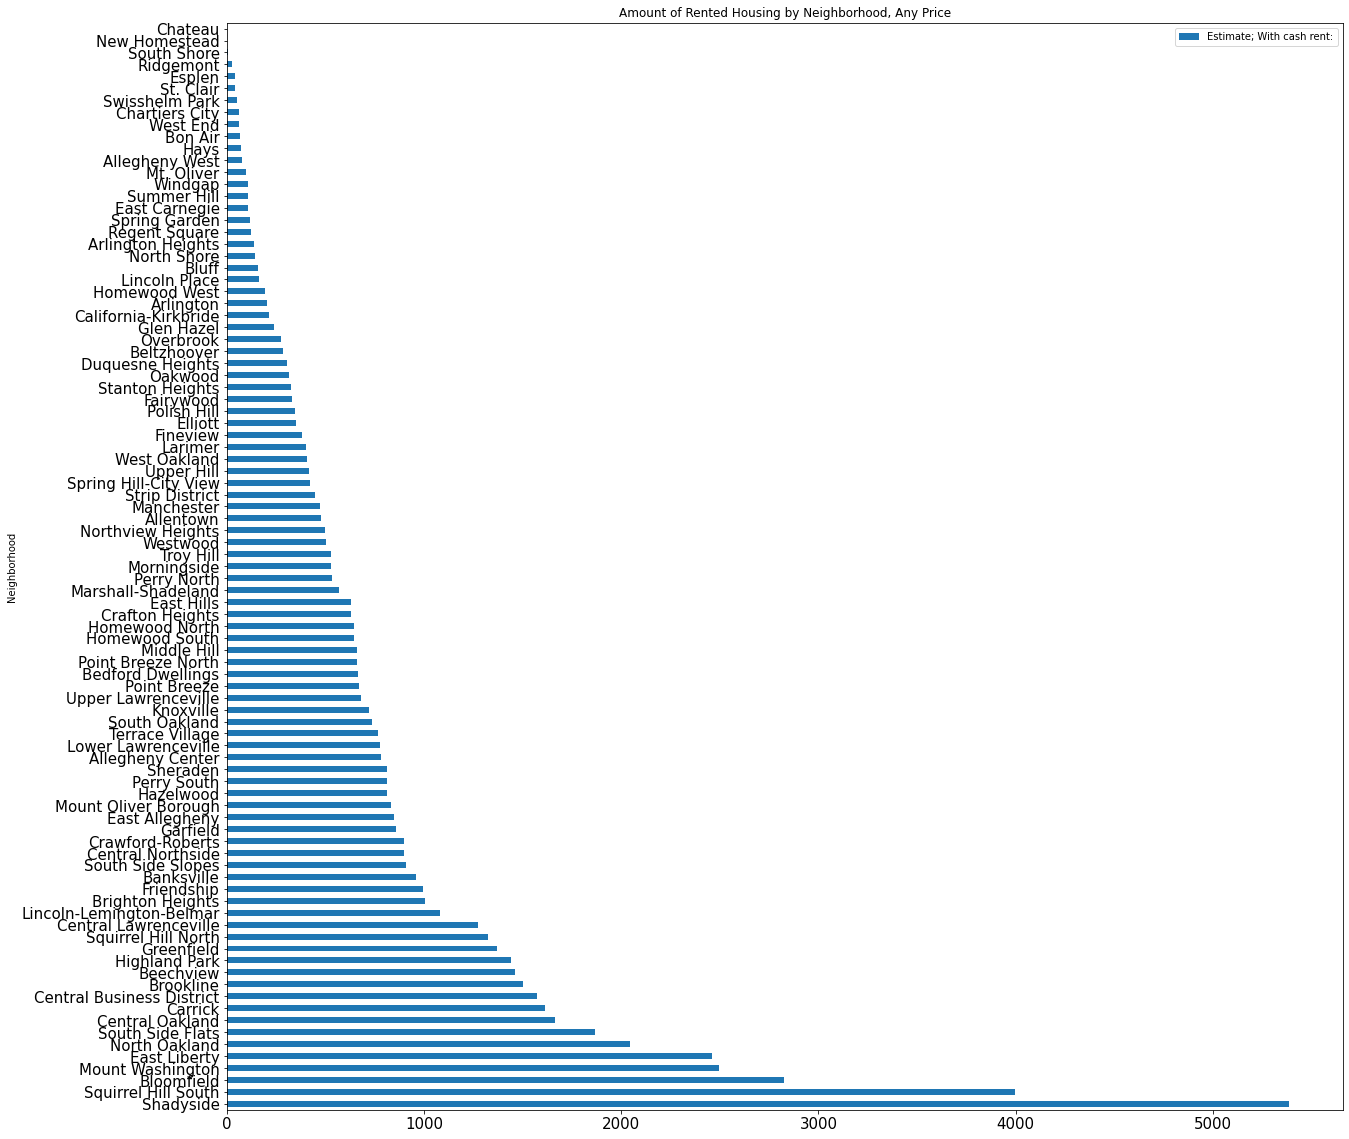

In [4]:
contract_rent_pandas["Estimate; With cash rent:"].sort_values(ascending = False).plot.barh(figsize = (20 , 20))
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Amount of Rented Housing by Neighborhood, Any Price")

From this bar graph, we can see that Shadyside and Squirrel Hill South have much more housing for rent than the other neighborhoods, though this graph does not give any indication for how expensive it is. After Bloomfield, the amount of housing for rent in each neighborhood decreases more gradually.

## Narrowing the Metric -- Housing Under $1000
The average Pitt graduate will earn approximately \\$45,438 a year upon graduating, if they seek full time employment (based on rough calculations from the class of 2018 class graduation data from the Pitt Career Center). If you are to follow the advice to spend 30% of your income on rent, you can afford a monthly rent of \\$1,136. To at least partially account for taxes, utilities, and other costs (as well as for simplicities sake), I will be rounding that down to an even \\$1000 per month. However, that is what the average graduate can afford. We are looking to go *cheap*, so \\$1000 a month is the upper limit of what is considered "acceptable" when looking for cheap housing, not the ideal.

First, I will create a list of columns with the estimates for the number of homes available for rents under $1000 (by removing all other columns in the dataset). Then, I will take the sum of those columns for each neighborhood and create a bar graph to compare them: 

Text(0.5, 1.0, 'Amount of Rented Housing by Neighborhood, Under $1000 a Month')

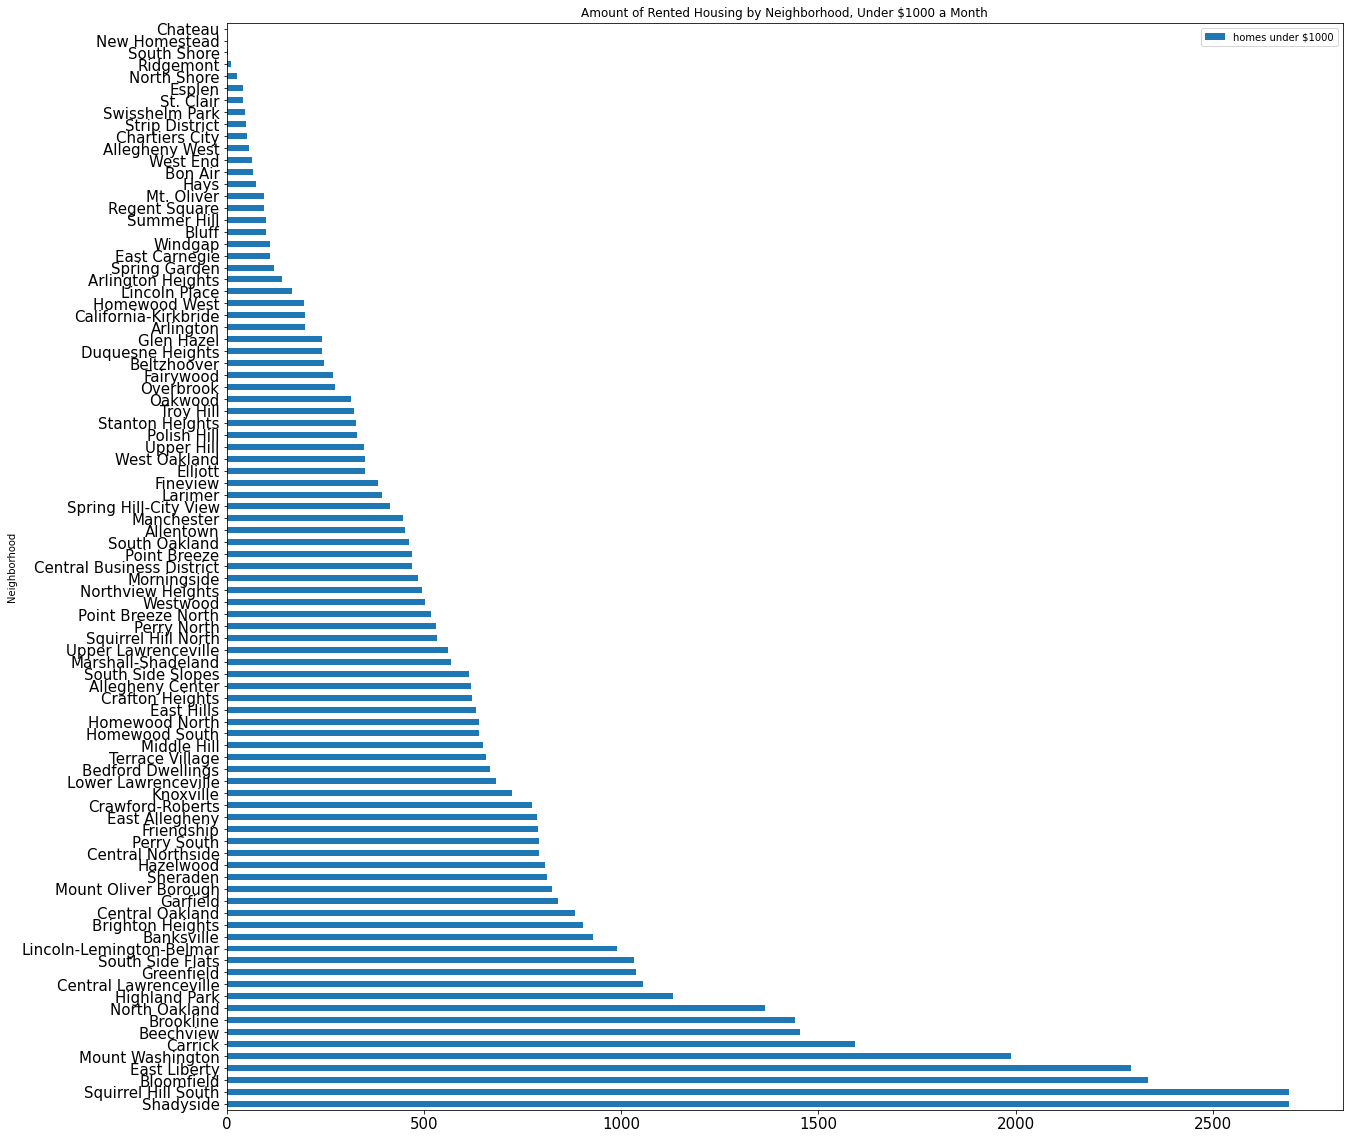

In [5]:
column_list = list(contract_rent_pandas)
columns_to_remove = ["Neighborhood" , "Id" , "Estimate; Total:" , "Margin of Error; Total:" , "Estimate; With cash rent:" , "Margin of Error; With cash rent:" , 
                    "Margin of Error; With cash rent: - Less than $100" , "Margin of Error; With cash rent: - $100 to $149" , "Margin of Error; With cash rent: - $150 to $199" , 
                    "Margin of Error; With cash rent: - $200 to $249" , "Margin of Error; With cash rent: - $250 to $299" , "Margin of Error; With cash rent: - $300 to $349" , 
                    "Margin of Error; With cash rent: - $350 to $399" , "Margin of Error; With cash rent: - $400 to $449" , "Margin of Error; With cash rent: - $450 to $499" , 
                    "Margin of Error; With cash rent: - $500 to $549" , "Margin of Error; With cash rent: - $550 to $599" , "Margin of Error; With cash rent: - $600 to $649" , 
                    "Margin of Error; With cash rent: - $650 to $699" , "Margin of Error; With cash rent: - $700 to $749" , "Margin of Error; With cash rent: - $750 to $799" , 
                    "Margin of Error; With cash rent: - $800 to $899" , "Margin of Error; With cash rent: - $900 to $999" , "Margin of Error; With cash rent: - $1,000 to $1,249" , 
                    "Margin of Error; With cash rent: - $1,250 to $1,499" , "Margin of Error; With cash rent: - $1,500 to $1,999" , "Margin of Error; With cash rent: - $2,000 to $2,499" , 
                    "Margin of Error; With cash rent: - $2,500 to $2,999" , "Margin of Error; With cash rent: - $3,000 to $3,499" , "Margin of Error; With cash rent: - $3,500 or more" , 
                    "Estimate; With cash rent: - $1,000 to $1,249" , "Estimate; With cash rent: - $1,250 to $1,499" , "Estimate; With cash rent: - $1,500 to $1,999" , 
                    "Estimate; With cash rent: - $2,000 to $2,499" , "Estimate; With cash rent: - $2,500 to $2,999" , "Estimate; With cash rent: - $3,000 to $3,499" , 
                    "Estimate; With cash rent: - $3,500 or more" , "Estimate; No cash rent" , "Margin of Error; No cash rent" , "homes under $1000"]

homes_under_1000 = sorted( list(set(column_list) - set(columns_to_remove)))


contract_rent_pandas["homes under $1000"] = contract_rent_pandas[homes_under_1000].sum(axis = 1)

contract_rent_pandas["homes under $1000"].sort_values(ascending = False).plot.barh(figsize = (20 , 20))
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Amount of Rented Housing by Neighborhood, Under $1000 a Month")

While Shadyside and Squirrel Hill South are still the two neighborhoods with the most rented housing, the difference between them and the other neighborhoods has significantly decreased, indicating a large amount of it was more expensive housing (and the housing remaining may trend to the more expensive end of the scale). Otherwise, many of the same neighborhoods are represented in the top 15, though some have changed order: Central Lawrenceville, Lincoln-Lemington-Belmar, and Banksville are now represented, while Central Oakland, the Central Business District, and Squirrel Hill North have dropped from the top 15. 

To get a better idea of location and these neighborhoods' proximities to each other and see a visual representation of the rent under \\$1000 in all neighborhoods, I read in the shape file of Pittsburgh's neighborhoods and merged it with the Contract Rent dataframe, plotting the "homes under \\$1000" column that I created.

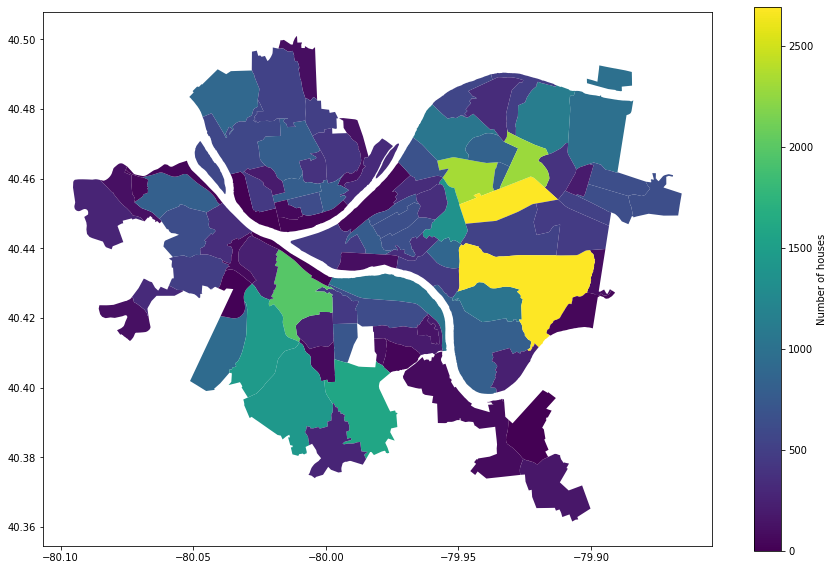

In [6]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")

housing_map = neighborhoods.merge(contract_rent_pandas, how='left', left_on='hood', right_on='Neighborhood')

housing_map[['hood','homes under $1000','geometry']].head()
housing_map.plot(column = "homes under $1000" , legend = True , legend_kwds = {"label" : "Number of houses"} , figsize = (15 , 10))


By looking at the map, we can see that Shadyside, Bloomfield, and East Liberty are a cluster of neighborhoods with a relatively high amount of rented housing for under \\$1000. Mount Washington, Beechview, Brookline, and Carrick form another sort of cluster, with slightly lower numbers than the other cluster but still high overall. Squirrel Hill South is a stand-alone neighborhood in terms of high amounts of rental properties for under \\$1000, but it is a large neighborhood on its own. 

A higher amount of housing in their general price range will be useful to someone looking for housing. Even if one neighborhood is absurdly cheap, if there is no housing in general then that doesnt help them very much-- price and amount need to be balanced. We have looked at the amount of housing, now it is time to compare prices.

## Average Price of Rent by Neighborhood

I then created another dataframe with only the list of columns I created earlier to remove the most expensive rent categories as well as the margin of error columns. From this, I could find the approximate average price of rent in each neighborhood. 

In [7]:
contract_rent_woMOE = contract_rent_pandas[homes_under_1000]
contract_rent_woMOE["homes under $1000"] = contract_rent_pandas[homes_under_1000].sum(axis = 1)

For each neighborhood, I found the average price by: 
* Finding the percentage of housing in each price category by dividing the number of houses in that category by the total umber of houses for under \\$1000
* Multiplying that by the middle price in the range (for example, \\$125 for the \\$100 - \\$149 price range)
* Adding all the price ranges together to find the weighted averages for each neighborhood

In [8]:
avg_price = []

for index, row in contract_rent_woMOE.iterrows():
    neighborhood_avg = 0
    
    if float(row["homes under $1000"]) != 0:
        neighborhood_avg = ((125 * float(row["Estimate; With cash rent: - $100 to $149"])/ float(row["homes under $1000"])) + 
                            (175 * float(row["Estimate; With cash rent: - $150 to $199"])/ float(row["homes under $1000"])) + 
                            (225 * float(row["Estimate; With cash rent: - $200 to $249"])/ float(row["homes under $1000"])) + 
                            (275 * float(row["Estimate; With cash rent: - $250 to $299"])/ float(row["homes under $1000"])) + 
                            (325 * float(row["Estimate; With cash rent: - $300 to $349"])/ float(row["homes under $1000"])) + 
                            (375 * float(row["Estimate; With cash rent: - $350 to $399"])/ float(row["homes under $1000"])) + 
                            (425 * float(row["Estimate; With cash rent: - $400 to $449"])/ float(row["homes under $1000"])) + 
                            (475 * float(row["Estimate; With cash rent: - $450 to $499"])/ float(row["homes under $1000"])) + 
                            (525 * float(row["Estimate; With cash rent: - $500 to $549"])/ float(row["homes under $1000"])) + 
                            (575 * float(row["Estimate; With cash rent: - $550 to $599"])/ float(row["homes under $1000"])) + 
                            (625 * float(row["Estimate; With cash rent: - $600 to $649"])/ float(row["homes under $1000"])) + 
                            (675 * float(row["Estimate; With cash rent: - $650 to $699"])/ float(row["homes under $1000"])) +
                            (725 * float(row["Estimate; With cash rent: - $700 to $749"])/ float(row["homes under $1000"])) + 
                            (775 * float(row["Estimate; With cash rent: - $750 to $799"])/ float(row["homes under $1000"])) + 
                            (850 * float(row["Estimate; With cash rent: - $800 to $899"])/ float(row["homes under $1000"])) + 
                            (950 * float(row["Estimate; With cash rent: - $900 to $999"])/ float(row["homes under $1000"])) + 
                            (50 * float(row["Estimate; With cash rent: - Less than $100"])/ float(row["homes under $1000"])) 
                            )
    avg_price.append(round(neighborhood_avg, 2))

    print("The average home price in " + index + " is $" + str(round(neighborhood_avg, 2)))

contract_rent_woMOE["Average Price in Neighborhood"] = avg_price

The average home price in Allegheny Center is $626.98
The average home price in Allegheny West is $629.02
The average home price in Allentown is $481.47
The average home price in Arlington is $675.63
The average home price in Arlington Heights is $361.79
The average home price in Banksville is $768.78
The average home price in Bedford Dwellings is $305.69
The average home price in Beechview is $574.38
The average home price in Beltzhoover is $472.36
The average home price in Bloomfield is $658.92
The average home price in Bluff is $583.17
The average home price in Bon Air is $493.66
The average home price in Brighton Heights is $526.25
The average home price in Brookline is $626.04
The average home price in California-Kirkbride is $445.73
The average home price in Carrick is $558.57
The average home price in Central Business District is $573.4
The average home price in Central Lawrenceville is $631.11
The average home price in Central Northside is $543.0
The average home price in Centr

We have the approximate average price in each neighborhood, but it is sorted alphabetically and not very useful for finding which is the lowest one, so I plotted the average prices of rent in each neighborhood to compare them:

Text(0.5, 1.0, 'Average Rent Price in Neighborhoods')

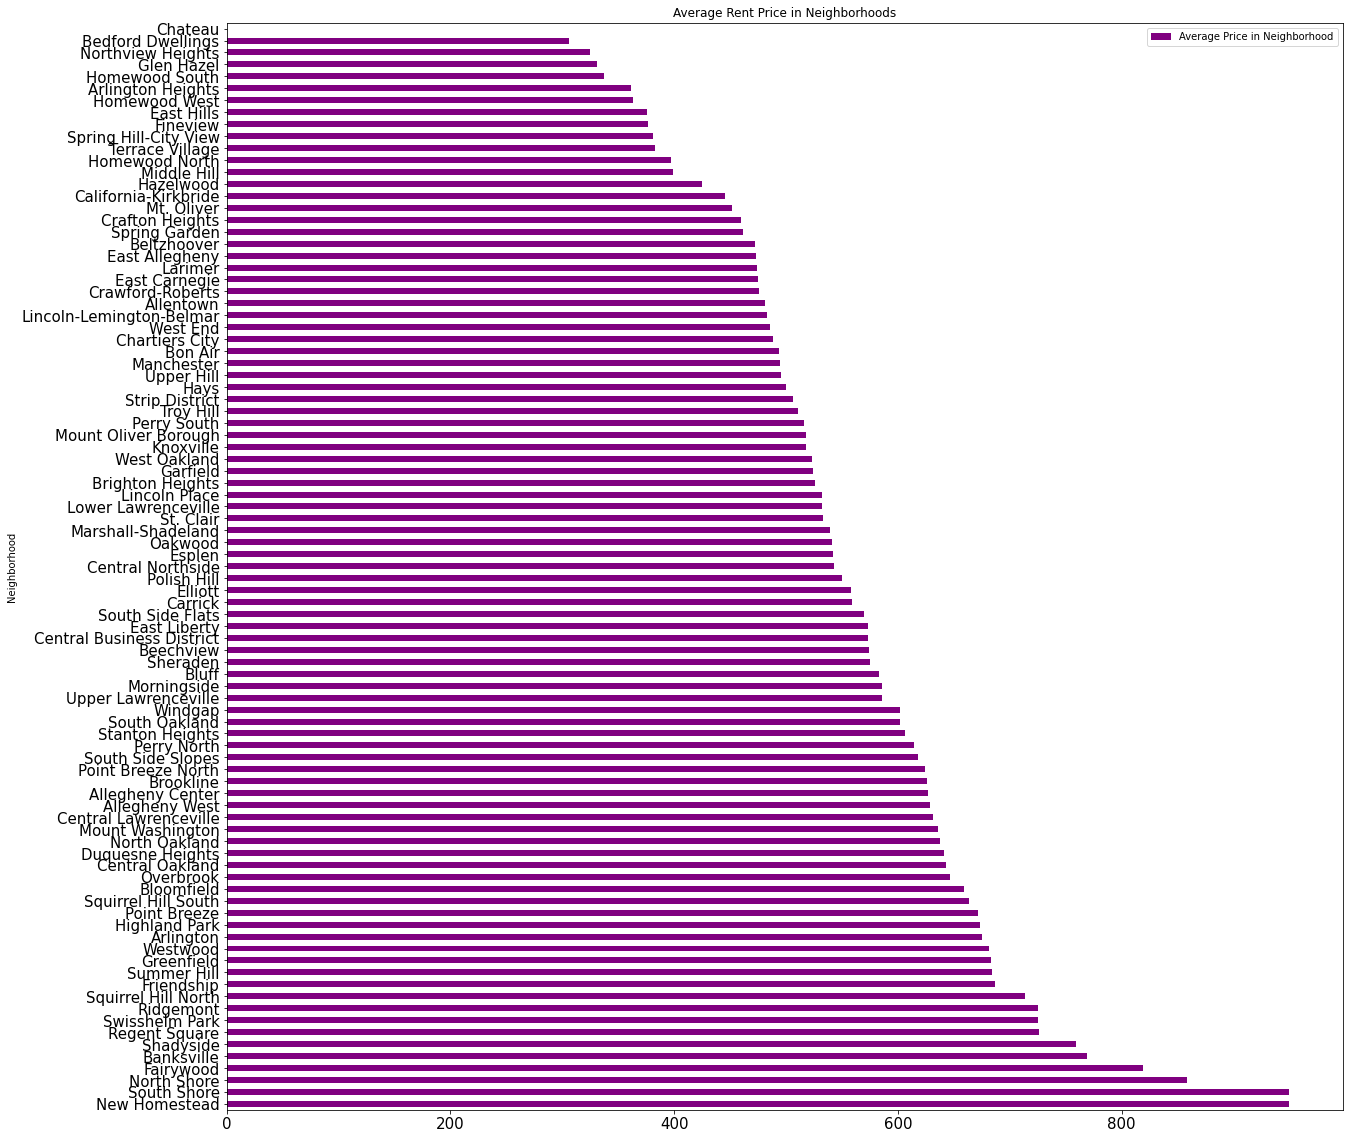

In [9]:
contract_rent_woMOE["Average Price in Neighborhood"].sort_values(ascending = False).plot.barh(figsize = (20, 20) , color = "purple")
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Average Rent Price in Neighborhoods")

It is still quite dense, but now we can see the neighborhoods in order of increasing average rent. 
* The 5 cheapest neighborhoods are: Bedford Dwellings, Northview Heights, Glen Hazel, Homewood South, and Arlington Heights
* The 5 most expensive neighborhoods are: New Homestead, South Shore, North Shore, Fairywood, and Banksville

*Chateau is technically listed as the least expensive neighborhood at an average rent of \\$0, but that is because there is no housing listed for rent for under \\$1000

## Ranking the Neighborhoods
To actually rank the neighborhoods, I had to account for both the amount of housing and the average price of housing. Since I want the most housing for the lowest price, I had to take the inverse of one number in combining them so that it would be finding the overall highest or lowest number. I decided to make the neighborhood with the highest number the best neighborhood because it is easiest to see the difference in scores this way. (However, when it is time to combine data with my group members, I will likely do the reverse because we want the lowest possible numbers for their datasets and it will be easiest to combine if I also want the lowest number.)

To do this, I multiplied the housing rented for under \\$1000 in each neighborhood (which I want the highest number of) by the inverse of the average price of rent in the neighborhood (which I want the lowest number of). In doing this, the neighborhood with the highest score should have the best combination of most possible available housing for the lowest price. 

In [16]:
neighborhood_score = []
score = 0

for index, row in contract_rent_woMOE.iterrows():
    if row["Average Price in Neighborhood"] != 0:
        score = float(row["homes under $1000"]) / float(row["Average Price in Neighborhood"])
    neighborhood_score.append(score)


contract_rent_woMOE["Neighborhood Score"] = neighborhood_score

However, this score is on an aritrary scale. The neighborhoods are technically ranked in the order they should be in, but if someone were to view a neighborhood's number individually they wouldn't know if it was a good score or a bad score. So, I made the scores on a 0-10 scale, with the best neighborhood having a 10, and the other's decreasing from there. 

In [17]:
highest_score = float(contract_rent_woMOE.loc["Squirrel Hill South" , "Neighborhood Score"])
scaled_scores = []

for index, row in contract_rent_woMOE.iterrows():
    scaled_score = (float(row["Neighborhood Score"]) / highest_score) * 10
    scaled_scores.append(scaled_score)

contract_rent_woMOE["Neighborhood Scaled Score"] = scaled_scores

Text(0.5, 1.0, 'Ranked Best Neighborhoods to Find Cheap Rented Housing In')

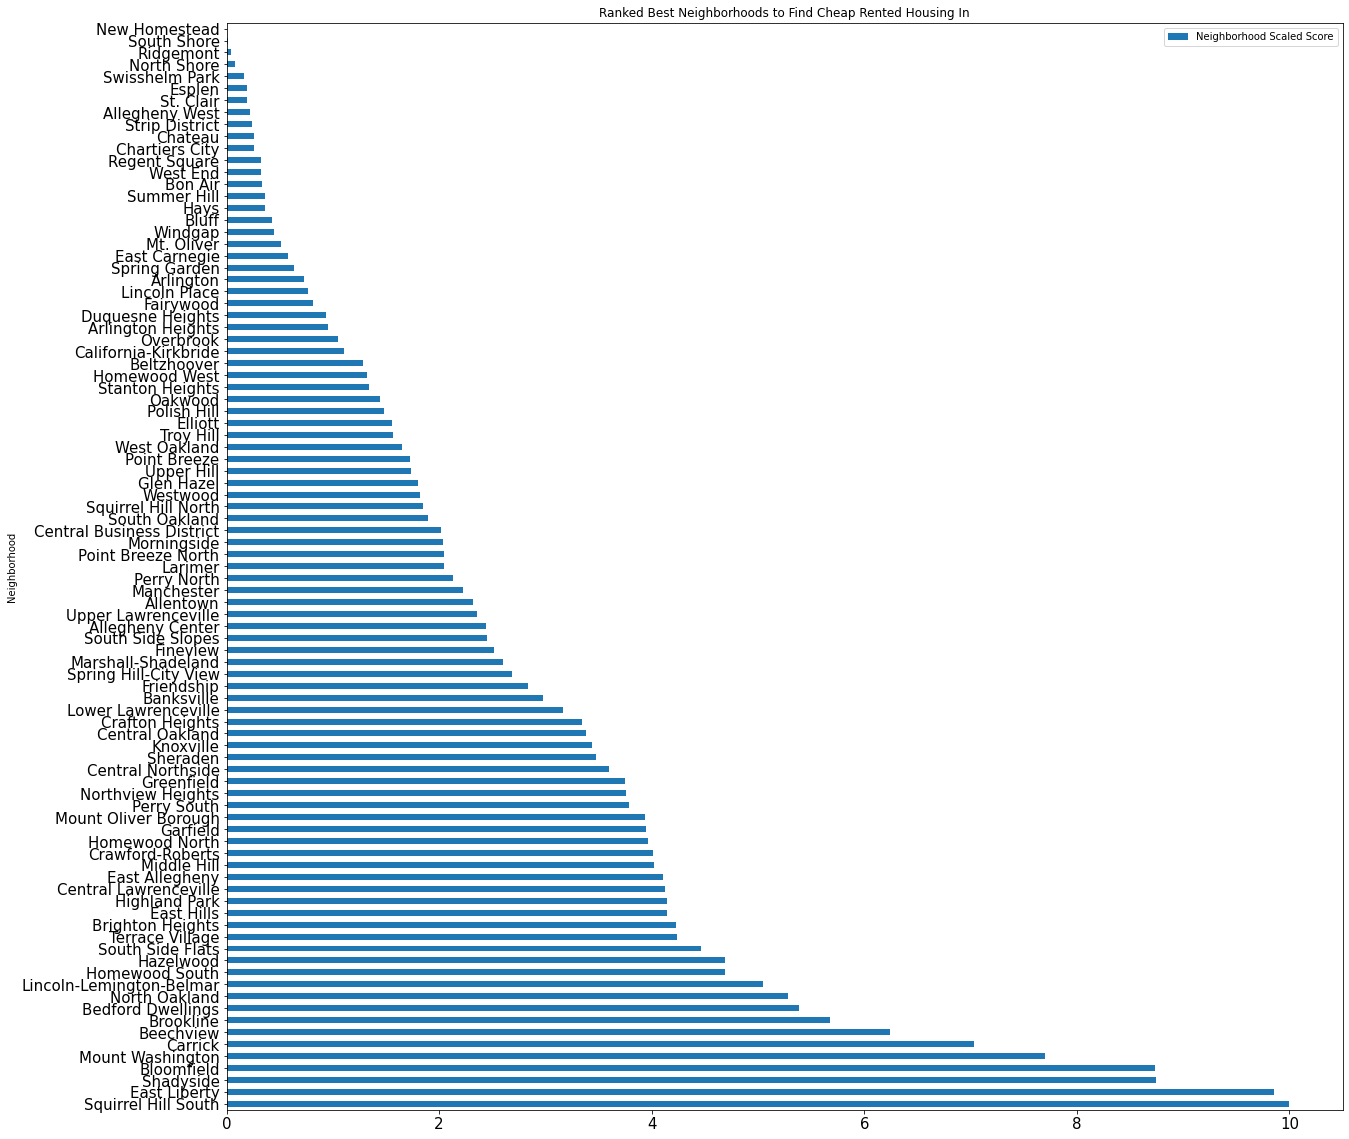

In [18]:
contract_rent_woMOE["Neighborhood Scaled Score"].sort_values(ascending = False).plot.barh(figsize = (20, 20))
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Ranked Best Neighborhoods to Find Cheap Rented Housing In")

The visual of the graph gives us the order of all neighborhoods on an understandable scale, but it doesn't give us the numerical values for each neighborhood. 
To fix that, I printed the scores for the 10 best neighborhoods: 

In [21]:
contract_rent_woMOE["Neighborhood Scaled Score"].sort_values(ascending = False).head(10)

Neighborhood
Squirrel Hill South    10.000000
East Liberty            9.857660
Shadyside               8.745613
Bloomfield              8.736903
Mount Washington        7.704536
Carrick                 7.031395
Beechview               6.241204
Brookline               5.674991
Bedford Dwellings       5.387640
North Oakland           5.278056
Name: Neighborhood Scaled Score, dtype: float64

## Conclusion
Squirrel Hill South is ranked as the best neighborhood to find cheap housing, being the neighborhood ranked as a 10 and used to scale all the other neighborhoods. Though it didn't have the cheapest average rent or the highest amount of rented housing, it was the best combination of those two that will give a potential renter the most options. 

After Squirrel Hill South, the next 4 best neighborhoods are: 
* East Liberty
* Shadyside
* Bloomfield
* Mount Washington

These neighborhoods will be the best for a broke recent college grad looking to rent their first place. There are exceptions to this, such as if *extremely* cheap rent or a specific loction/proximity is needed, but those situations will be the exception and not the rule (the price issue can often be fixed by having roommates as well). Squirrel Hill South has the amount of housing and the price range that will satisfy most recent college grads. 